In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt



In [7]:
#let's make another branching model
class branching_model:
    def __init__(self,
                 rho,
                 d,
                 v,
                 c,
                 dist):
        self.rho = rho
        self.d = d
        self.cure_rate= float(1)/d
        self.v = v
        self.c =c 
        self.dist = dist
        self.mu = np.arange(len(dist)).dot(np.array(dist))
        
        print("R0 equal to "+str(rho*self.mu*d))
        
        
    def simulate(self):
        I = 10
        upper_bound = 10000
        Is =[I]
        R0_est = []
        
        diff_est = 0
        
        
        
        while True:
            new_infecs = 0
            for i in range(I):
                num_edges = np.random.choice(len(self.dist),p=self.dist)
                for j in range(num_edges):
                    if np.random.rand() < self.rho:
                        new_infecs+=1
                
                if np.random.rand() < self.v:
                    new_infecs -=1
                
                    num_edges = np.random.choice(len(self.dist),p=self.dist)
                    
                    for j in range(num_edges):
                        if np.random.rand() < self.c*self.rho:
                            new_infecs -=1
                    
                else:
                    if np.random.rand() < self.cure_rate:
                        new_infecs -=1
                
            
            new_I = max([0,I + new_infecs])
            I = new_I
            Is.append(I)
            growth_rate = float(Is[-1]-Is[-2])/float(Is[-2])
            
            
            diff_est*= (len(Is)-2)
            diff_est += growth_rate
            diff_est /=float(len(Is)-1)
            
            R0_est_val = (self.d/(1-self.c*self.v))*(diff_est+self.v+((1-self.v)/self.d))
            R0_est.append(R0_est_val)
            if I >upper_bound:
                break
            if I <= 0:
                break
            
        plt.figure()
        plt.plot(Is)
        plt.title('infections')
        plt.show()
        
        plt.figure()
        plt.plot(R0_est)
        plt.plot(np.arange(len(R0_est)), (self.d*self.rho*self.mu)*np.ones(len(R0_est)))
        plt.title('R0 Estimate')
        plt.show()
        
            
            

R0 equal to 5.1639908265145


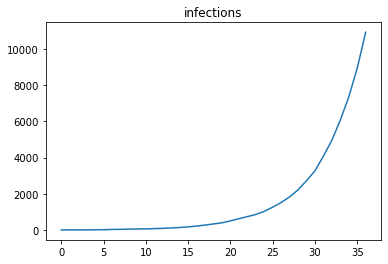

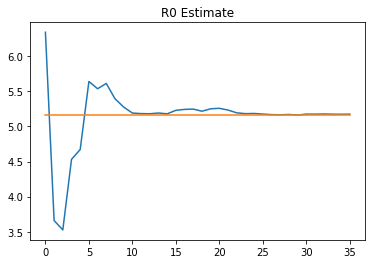

In [9]:
rho =.1
d = 14
v = .08
c = .2
dist = np.exp(-.1*np.arange(10))
dist/=np.sum(dist)
model = branching_model(rho,d,v,c,dist)

model.simulate()